***20MAI0050- Nancy Pal***

https://github.com/nancypal50/DL_LAB/tree/main/ASSI5

***STOCK PREDICTION OF MICROSOFT***

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


**Reading data using parse date**

As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [ ]:
df_final = pd.read_csv("/content/MSFT (2).csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [ ]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [ ]:
df_final.shape

(8859, 6)

In [ ]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8859.000000,8859.000000,8859.000000,8859.000000,8859.000000,8.859000e+03
mean,34.879813,35.257926,34.497369,34.888821,29.935581,5.952684e+07
std,44.173660,44.625643,43.708272,44.191263,44.310490,3.857998e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.876953,3.812500,3.851563,2.446323,3.558610e+07
50%,26.590000,26.879999,26.290001,26.590000,18.698833,5.269540e+07
75%,36.774999,37.015625,36.168751,36.704375,27.229476,7.339240e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [ ]:
df_final.isnull().values.any()

False

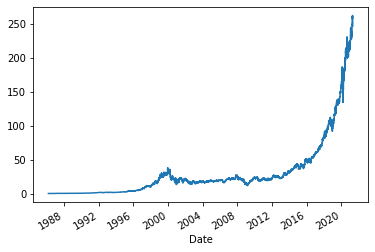

In [ ]:
df_final['Adj Close'].plot()

***Co-relation Analysis***

In [ ]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

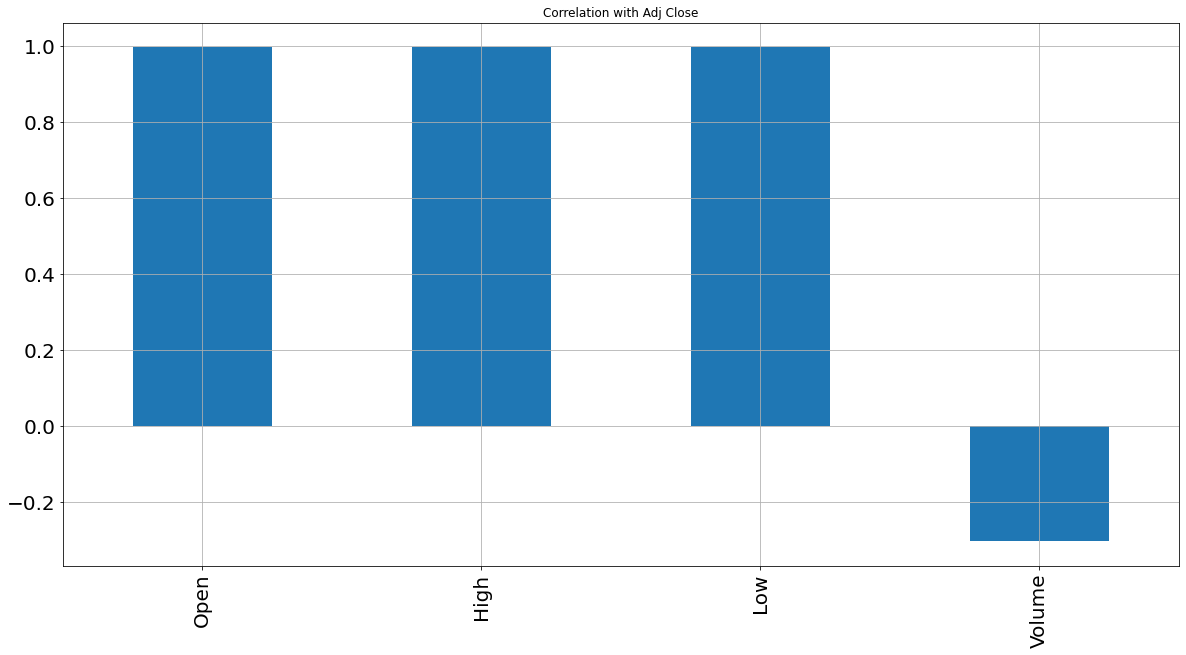

In [ ]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:

test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [ ]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

***Normalizing the data***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000036,0.000000,1.000000
1986-03-14,0.000033,0.000040,0.000033,0.297096
1986-03-17,0.000046,0.000043,0.000047,0.127119
1986-03-18,0.000053,0.000043,0.000040,0.063588
1986-03-19,0.000043,0.000033,0.000033,0.044285


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000036,0.000000,1.000000
1986-03-14,0.000033,0.000040,0.000033,0.297096
1986-03-17,0.000046,0.000043,0.000047,0.127119
1986-03-18,0.000053,0.000043,0.000040,0.063588
1986-03-19,0.000043,0.000033,0.000033,0.044285


Shape of features :  (8859, 4)
Shape of target :  (8859, 1)


,Open,High,Low,Volume
Date,,,,
2021-04-28,0.978667,0.974724,0.972239,0.043322
2021-04-29,0.976297,0.973052,0.957052,0.037189
2021-04-30,0.954429,0.961573,0.959359,0.027805
2021-05-03,0.968422,0.966400,0.965203,0.016826
2021-05-04,0.959132,0.954466,0.944594,0.029580


,Adj Close
Date,
2021-04-28,252.509995
2021-04-29,252.179993
2021-04-30,251.860001
2021-05-03,247.789993
2021-05-04,246.470001



 -----After process------ 

Shape of features :  (8769, 4)
Shape of target :  (8769, 1)


,Adj Close
Date,
2020-12-17,218.087708
2020-12-18,222.078506
2020-12-21,223.425415
2020-12-22,220.512131
2020-12-23,222.238144


***Train test Split using Time-series split***

In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape

(7972, 4)

In [ ]:
X_test.shape

(797, 4)

In [ ]:
y_train.shape

(7972,)

In [ ]:
y_test.shape

(797,)

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

***Benchmark Model***

RMSE:  163.0738270702925
R2 score:  -149.0496056217249


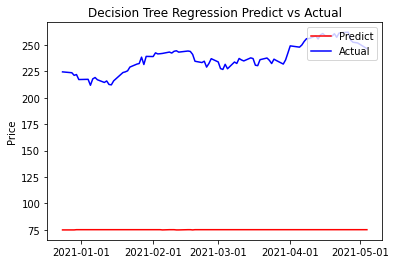

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

***Process the data for LSTM***

In [ ]:

X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

**Building LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
997/997 [==============================] - 4s 2ms/step - loss: 58.8105
Epoch 2/200
997/997 [==============================] - 2s 2ms/step - loss: 103.8252
Epoch 3/200
997/997 [==============================] - 3s 3ms/step - loss: 151.5167
Epoch 4/200
997/997 [==============================] - 3s 3ms/step - loss: 133.9644
Epoch 5/200
997/997 [==============================] - 3s 3ms/step - loss: 104.0976
Epoch 6/200
997/997 [==============================] - 3s 3ms/step - loss: 72.0277
Epoch 7/200
997/997 [==============================] - 2s 2ms/step - loss: 42.5233
Epoch 8/200
997/997 [==============================] - 2s 2ms/step - loss: 21.1521
Epoch 9/200
997/997 [==============================] - 3s 3ms/step - loss: 9.7913
Epoch 10/200
997/997 [==============================] - 3s 3ms/step - loss: 5.4708
Epoch 11/200
997/997 [==============================] - 2s 2ms/step - loss: 4.1853
Epoch 12/200
997/997 [==============================] - 2s 2ms/step - loss: 3.8052
E

**Evaluating the model**

In [ ]:

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.904
The R2 score on the Test set is:	0.747


**Prediction of LSTM**

In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

797/797 [==============================] - 1s 1ms/step - loss: 474.2175


In [ ]:
print('LSTM: %f'%score_lstm)

LSTM: 474.217468


In [ ]:

y_pred_test_LSTM = model_lstm.predict(X_tst_t)

**LSTM Prediction Visualization**

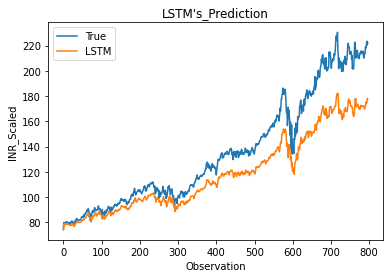

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()